In [7]:
import numpy as np 
import matplotlib.pyplot as plt

# Torch
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import WeightedRandomSampler
import torch.nn as nn
from torch.nn.parameter import Parameter
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchsummary import summary

# Save/Load as mat.
from scipy.io import savemat, loadmat
import h5py
import mat73 # https://github.com/skjerns/mat7.3

# Progress Bar
from rich.progress import track
from rich.progress import Progress

# Other
import argparse
import multiprocessing as mp
import os
import scipy.signal as signal
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
from plot import *

# User-defined
from mat2np_segment_all_subject import *
from dsp_preprocess import *
from dataset_parser import *
from models import *
from feature_extractor import *
from set_args import *
from train_test_process import *
from vit import *

In [27]:
pretrain_model_PATH = "Results/ViT_FNet_20231114_0144/ViT_FNet.pth"
# model = eval(f"{args.model_type}(window_size, args.num_channel,number_gesture=number_gesture, class_rest=args.class_rest)").to(device)
model = ViT_FNet(400,12)
model.load_state_dict(torch.load(pretrain_model_PATH)) # Pretrained model

<All keys matched successfully>

Text(0.5, 1.0, 'Position embedding similarities')

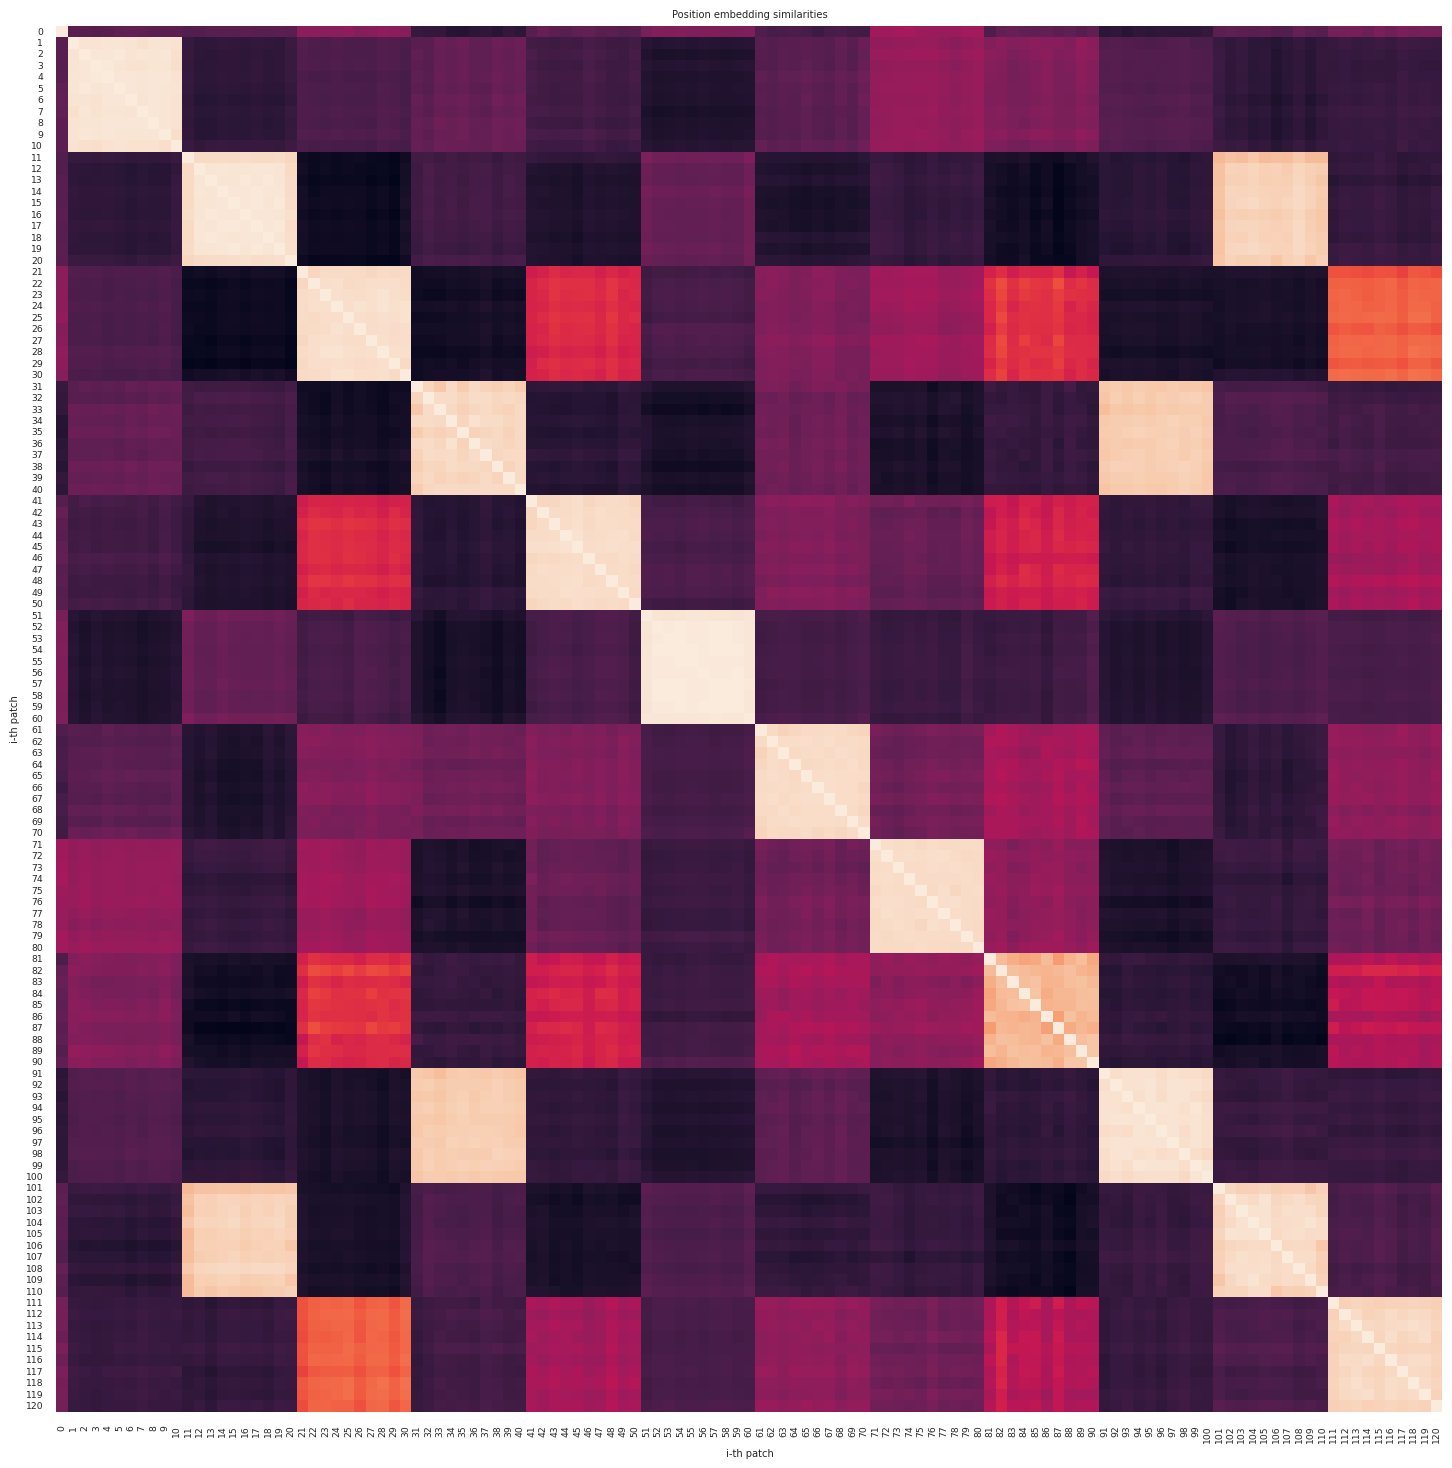

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

E_pos = np.squeeze(model.pos_embedding.detach().numpy())
E_pos_cos_sim = cosine_similarity(E_pos)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(18, 18))
sns.set(font_scale=0.6)
sns.heatmap(E_pos_cos_sim, cbar=False, square=True, xticklabels=True, yticklabels=True)
plt.xlabel('i-th patch')
plt.ylabel('i-th patch')
plt.title('Position embedding similarities')